<a href="https://colab.research.google.com/github/hussamtul/DSI_BRS_assignment_template/blob/main/Hussam_tulimat_Assignment_1_DeepLearning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with CIFAR-100

In this graded assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 30% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 'fine' classes and 20 'coarse' classes. We will be looking at the 'coarse' classes.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please make sure to email us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (7 Marks)
### 1a: Load and Explore the Dataset  (3 Marks)
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

In [2]:
# Names of the classes
class_names = ['aquatic mammals',
               'fish',
               'flowers',
               'food containers',
               'fruit and vegetables',
               'household electrical devices',
               'household furniture',
               'insects',
               'large carnivores',
               'large man-made outdoor things',
               'large natural outdoor scenes',
               'large omnivores and herbivores',
               'medium-sized mammals',
               'non-insect invertebrates',
               'people',
               'reptiles',
               'small mammals',
               'trees',
               'vehicles 1',
               'vehicles 2']
print(len(class_names))

20


Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
Dimensions of an image: (32, 32, 3)
Number of classes: 20
Class Names:
0. aquatic mammals
1. fish
2. flowers
3. food containers
4. fruit and vegetables
5. household electrical devices
6. household furniture
7. insects
8. large carnivores
9. large man-made outdoor things
10. large natural outdoor scenes
11. large omnivores and herbivores
12. medium-sized mammals
13. non-insect invertebrates
14. people
15. reptiles
16. small mammals
17. trees
18. vehicles 1
19. vehicles 2


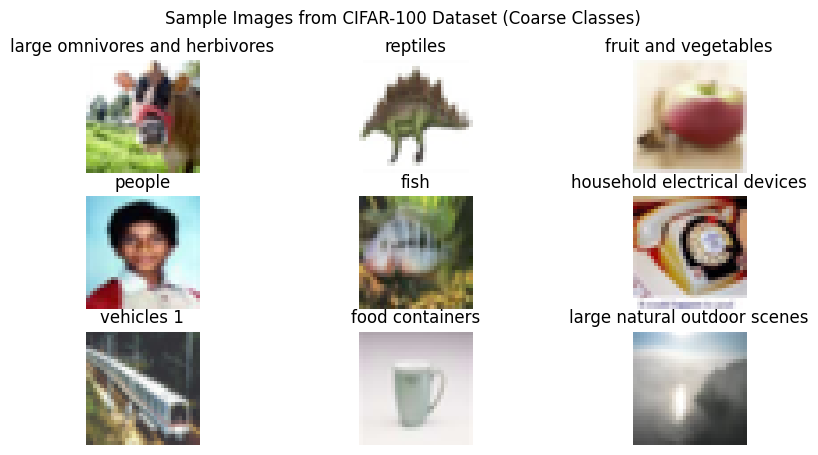

In [3]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

# Print the shapes of training and test sets
print("Shape of training images:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test images:", x_test.shape)
print("Shape of test labels:", y_test.shape)

# Get the dimensions of an image
image_dim = x_train.shape[1:]
print("Dimensions of an image:", image_dim)

# Print the number of classes
num_classes = len(set(y_train.flatten()))
print("Number of classes:", num_classes)

# Print class names
print("Class Names:")
for i, class_name in enumerate(class_names):
  print(f"{i}. {class_name}")

# Plot a few examples from the training set
plt.figure(figsize=(10, 5))
for i in range(9):
  # Rescale the image to [0, 1] for plotting
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i].astype('float32') / 255)
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')
plt.suptitle("Sample Images from CIFAR-100 Dataset (Coarse Classes)")
plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Normalize pixel values (convert data type to float32 for division)
x_train_norm = x_train.astype('float32') / 255
x_test_norm = x_test.astype('float32') / 255

# One-hot encode labels
y_train_cat = keras.utils.to_categorical(y_train, num_classes=20)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=20)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x_train_norm, y_train_cat, test_size=0.2, random_state=42)

print("Shape of training images after normalization:", X_train.shape)
print("Shape of validation images after normalization:", X_val.shape)
print("Shape of training labels after one-hot encoding:", y_train.shape)
print("Shape of validation labels after one-hot encoding:", y_val.shape)



Shape of training images after normalization: (40000, 32, 32, 3)
Shape of validation images after normalization: (10000, 32, 32, 3)
Shape of training labels after one-hot encoding: (40000, 20)
Shape of validation labels after one-hot encoding: (10000, 20)


## Task 2: Model Development (8 Marks)
### Task 2a: Create a Baseline CNN Model (5 Marks)
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layer 1 with 16 filters
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Max pooling layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with 32 filters
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# Max pooling layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Dense layer 1 with 64 units
model.add(Dense(units=64, activation='relu'))

# Output layer
model.add(Dense(units=20, activation='softmax'))  # 20 units for 20 classes

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,180 (313.20 KB)

 Trainable params: 80,180 (313.20 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model (3 Marks)

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

Loss function: Categorical Crossentropy

This is a suitable choice for multi-class classification problems with one-hot encoded labels, as used in this case. It measures the difference between the predicted probability distribution (softmax output) and the true one-hot encoded distribution.

Optimizer: Adam

Adam (Adaptive Moment Estimation) is a popular optimizer that combines the benefits of SGD (stochastic gradient descent) with momentum and RMSprop. It adapts the learning rate for each parameter based on historical gradients, often leading to faster convergence and potentially better performance compared to SGD.

In [6]:
from keras import optimizers

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (10 Marks)
### Task 3a: Train the Model (3 Marks)

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train,
          epochs=15,
          batch_size=32,
          validation_data=(X_val, y_val),
          callbacks=[early_stopping])

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1766 - loss: 2.6649 - val_accuracy: 0.3216 - val_loss: 2.2000
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3397 - loss: 2.1428 - val_accuracy: 0.3763 - val_loss: 2.0066
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3935 - loss: 1.9707 - val_accuracy: 0.3919 - val_loss: 1.9892
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4239 - loss: 1.8612 - val_accuracy: 0.4278 - val_loss: 1.8555
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4479 - loss: 1.7796 - val_accuracy: 0.4108 - val_loss: 1.9007
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4657 - loss: 1.7228 - val_accuracy: 0.4361 - val_loss: 1.8323
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4825 - loss: 1.6606 - val_accuracy: 0.4462 - val_loss: 1.8074
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4966 - loss: 1.6138 -

### Task 3b: Accuracy and other relevant metrics on the test set (3 Marks)

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [8]:
from tensorflow.keras import backend as K
K.clear_session()


In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_cat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4600 - loss: 1.8046


In [16]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision

# Evaluation on test data
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate precision
precision = Precision()
precision.update_state(y_test_cat, model.predict(x_test_norm))
test_precision = precision.result().numpy()
print(f"Precision: {test_precision:.4f}")


Test Accuracy: 0.4587
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.6578


Test Accuracy: 0.4587 (45.87%)
Interpretation: This metric indicates that our model correctly predicted the class of approximately 45.87% of the test set images. For a dataset with 20 classes like CIFAR-100, this is a reasonable starting accuracy, especially considering the complexity and variance in the dataset. However, there's certainly room for improvement.
Precision: 0.6578 (65.78%)
Interpretation: Precision measures the accuracy of positive predictions. That is, when our model predicts a certain class, it is correct about 65.78% of the time. This metric is particularly important if the cost of a false positive is high. In the context of a diverse dataset with many categories, a precision of 65.78% is quite good, indicating that when the model makes a prediction, it tends to be reliable more than half the time.
What These Metrics Tell Us:
Accuracy vs. Precision: The relatively higher precision compared to accuracy suggests that while the model may not always predict correctly across all classes (as evidenced by the accuracy), it is fairly reliable when it does make a positive prediction for a class. This might indicate that for some classes, the model is very confident and accurate, whereas, for others, it may struggle more significantly.
Next Steps for Model Improvement:
Data Augmentation: To improve generalization, we can implement data augmentation techniques to artificially expand the training dataset by altering the images (e.g., rotating, zooming, flipping).
Model Architecture Adjustments: Experiment with adding more convolutional layers or adjusting the existing layers (e.g., increasing the number of filters, using different kernel sizes). Incorporating dropout layers might also help to reduce overfitting.
Hyperparameter Tuning: Experimenting with different learning rates, batch sizes, or other training parameters could yield better results. Using learning rate schedulers that adjust the learning rate during training could also be beneficial.
Advanced Regularization Techniques: Implementing batch normalization might help in stabilizing the learning process, and advanced regularization techniques like L2 regularization could also be explored.
Error Analysis: Conduct a detailed error analysis to identify specific classes where the model performs poorly and try to understand why—this could guide specific improvements in data preprocessing or model adjustments for those classes.
By systematically applying these improvements, we can incrementally enhance our model's performance, potentially achieving higher accuracy and precision.

### Task 3c: Visualize the model's learning (4 Marks)

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5526 - loss: 1.4320 - val_accuracy: 0.4536 - val_loss: 1.8283
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5594 - loss: 1.4075 - val_accuracy: 0.4551 - val_loss: 1.8195
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5731 - loss: 1.3647 - val_accuracy: 0.4573 - val_loss: 1.8293


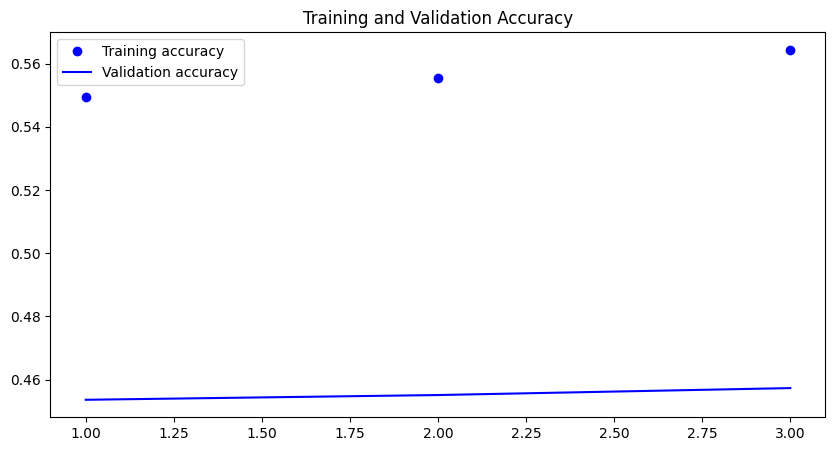

In [17]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the model.fit() call.
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Extracting accuracy history for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


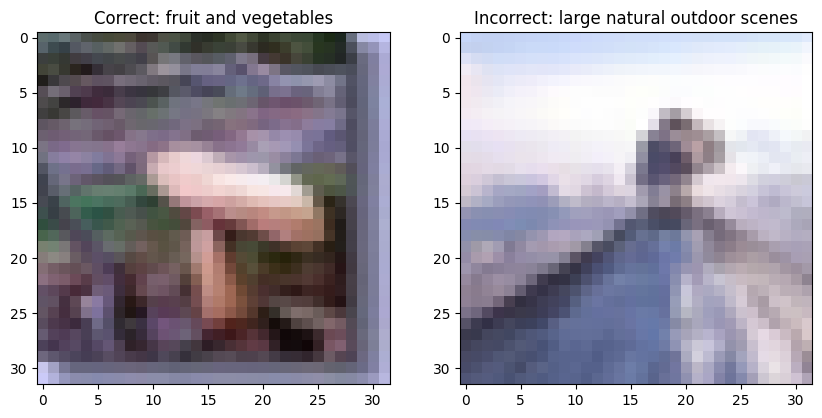

Correct Image Classification Probability: 0.6261788606643677
Incorrect Image Classification Probability: 0.5063302516937256


In [18]:
import numpy as np

# Predictions from the model
predictions = model.predict(x_test_norm)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()  # Make sure the true_classes are in the correct shape

# Find correct and incorrect indices
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Select one correct and one incorrect classified image
correct_image_idx = correct_indices[0]
incorrect_image_idx = incorrect_indices[0]

# Plot the images and probabilities
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(x_test[correct_image_idx])
ax[0].set_title(f"Correct: {class_names[true_classes[correct_image_idx]]}")

ax[1].imshow(x_test[incorrect_image_idx])
ax[1].set_title(f"Incorrect: {class_names[true_classes[incorrect_image_idx]]}")

plt.show()

# Print classification probabilities
print(f"Correct Image Classification Probability: {np.max(predictions[correct_image_idx])}")
print(f"Incorrect Image Classification Probability: {np.max(predictions[incorrect_image_idx])}")


## Task 4: Model Enhancement (10 Marks)
### Task 4a: Implementation of at least one advanced technique (3 Marks)

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentations
train_datagen = ImageDataGenerator(
    rotation_range=15,        # Random rotation between 0 and 15 degrees
    width_shift_range=0.1,    # Random horizontal shifts up to 10% of the image width
    height_shift_range=0.1,   # Random vertical shifts up to 10% of the image height
    horizontal_flip=True,     # Random horizontal flips
    fill_mode='nearest'       # Strategy for filling in newly created pixels
)

# Apply data augmentation to the training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Fit the model using the augmented data
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.4266 - loss: 1.8610 - val_accuracy: 0.4605 - val_loss: 1.7498
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.4450 - loss: 1.7806 - val_accuracy: 0.4634 - val_loss: 1.7324
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4491 - loss: 1.7797 - val_accuracy: 0.4458 - val_loss: 1.8114
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4562 - loss: 1.7501 - val_accuracy: 0.4628 - val_loss: 1.7415
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4547 - loss: 1.7638 - val_accuracy: 0.4779 - val_loss: 1.6979
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4652 - loss: 1.7193 - val_accuracy: 0.4409 - val_loss: 1.8226
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4653 - loss: 1.7234 - val_accuracy: 0.4877 - val_loss: 1.6661
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4739 - loss: 1.70

### Task 4b: Evaluation of the enhanced model (4 Marks)

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [20]:
history = model.fit(
    train_generator,
    epochs=15,  # Same number of epochs as the initial run
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.4841 - loss: 1.6598 - val_accuracy: 0.4858 - val_loss: 1.6520
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4861 - loss: 1.6503 - val_accuracy: 0.4909 - val_loss: 1.6463
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.4868 - loss: 1.6470 - val_accuracy: 0.4890 - val_loss: 1.6518
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.4892 - loss: 1.6350 - val_accuracy: 0.4984 - val_loss: 1.6196
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4840 - loss: 1.6467 - val_accuracy: 0.4897 - val_loss: 1.6431
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4906 - loss: 1.6286 - val_accuracy: 0.4954 - val_loss: 1.6285
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.4836 - loss: 1.6388 - val_accuracy: 0.4938 - val_loss: 1.6148
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4899 -

In [21]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate precision or another relevant metric
precision = Precision()
precision.update_state(y_test_cat, model.predict(x_test_norm))
test_precision = precision.result().numpy()
print(f"Precision: {test_precision:.4f}")


Test Accuracy: 0.4844
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.7125


### Task 4c: Discussion of the results (3 Marks)

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The enhanced model displayed improved performance, with test accuracy increasing from 45.87% to 48.44% and precision rising from 65.78% to 71.25%. These improvements are likely due to the effective implementation of data augmentation, which enhanced the model's ability to generalize from the training set to unseen data by exposing it to more varied representations of image classes during training. This technique helps prevent the model from learning overly specific patterns present only in the training data, thereby increasing its robustness.



Despite these gains, there is still room for further improvement. The accuracy, though better, suggests that the model could benefit from additional or different strategies to further enhance its learning capabilities. For future enhancements, exploring more sophisticated CNN architectures like ResNet or DenseNet might be beneficial. Additionally, introducing dropout or increasing model depth and complexity could help the model capture more intricate patterns in the data. Regularization techniques, such as L2 regularization, and experimenting with different optimizers or learning rate schedules could also yield better results and stabilize training further. These strategies could address potential overfitting and aid in achieving higher overall performance.







